# MODELO PREDICTIVO SOBRE COCHES DE SEGUNDA MANO

In [405]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Modelos de Regresión
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

# Métricas para Regresión
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import GradientBoostingRegressor as gbr

In [406]:
df = pd.read_csv("../dataset_limpio.csv", index_col = 0)

In [407]:
df.reset_index(inplace = True)

In [408]:
df

,index,Nombre,Detalles,Precio al contado,Año matriculación,Kilometros,Tipo combustible,Tipo de cambio,Potencia,Puertas,Tipo de vendedor
0,0,CITROEN C5 Aircross,BlueHDi S&S Shine EAT8 180,19500.0,2019,6247.3,Diésel,Automática,176,5,Profesional
1,1,MERCEDES Clase A,A 250 4Matic 7G-DCT,37400.0,2022,905.8,Gasolina,Automática,224,5,Profesional
2,2,MINI Countryman,COUNTRYMAN COOPER SD ALL4,12990.0,2014,9510.0,Diésel,Manual,143,5,Profesional
3,3,PEUGEOT 2008,1.2 PureTech S&S GT Line 110,10990.0,2016,9993.7,Gasolina,Manual,110,5,Profesional
4,4,MERCEDES Clase B,B 200 7G-DCT,23790.0,2019,3456.7,Gasolina,Automática,163,5,Profesional
...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,SEAT León,1.6TDI CR Reference 90,10490.0,2016,15206.1,Diésel,Manual,90,5,Profesional
9995,9996,FORD Transit,FT 350 L3 Kombi Ambiente 130,26900.0,2019,11546.9,Diésel,Manual,130,4,Profesional
9996,9997,FIAT Punto,1.3Mjt 16v Feel/Class,4490.0,2008,14911.5,Diésel,Manual,70,5,Profesional
9997,9998,BMW X1,sDrive 18d,20490.0,2019,9459.5,Diésel,Manual,150,5,Profesional


### EXPLORACIÓN DE LOS DATOS

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              9999 non-null   int64  
 1   Nombre             9999 non-null   object 
 2   Detalles           9999 non-null   object 
 3   Precio al contado  9999 non-null   float64
 4   Año matriculación  9999 non-null   int64  
 5   Kilometros         9999 non-null   float64
 6   Tipo combustible   9999 non-null   object 
 7   Tipo de cambio     9999 non-null   object 
 8   Potencia           9999 non-null   int64  
 9   Puertas            9999 non-null   int64  
 10  Tipo de vendedor   9999 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 859.4+ KB


In [410]:
df.describe()

,index,Precio al contado,Año matriculación,Kilometros,Potencia,Puertas
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4999.755376,21677.690669,2019.449645,6394.439744,147.391239,4.782978
std,2886.927089,14560.976532,3.464367,5776.304487,65.769516,0.603307
min,0.000000,1000.000000,1994.000000,0.000000,45.000000,2.000000
25%,2500.500000,14390.000000,2018.000000,2456.600000,110.000000,5.000000
50%,5000.000000,18990.000000,2020.000000,5526.500000,130.000000,5.000000
75%,7499.500000,25990.000000,2022.000000,9000.000000,158.000000,5.000000
max,9999.000000,890000.000000,2024.000000,99800.000000,680.000000,5.000000


In [411]:
# Comprobar valores duplicados

display(df.drop_duplicates)

<bound method DataFrame.drop_duplicates of       index               Nombre                       Detalles  \
0         0  CITROEN C5 Aircross     BlueHDi S&S Shine EAT8 180   
1         1     MERCEDES Clase A            A 250 4Matic 7G-DCT   
2         2      MINI Countryman      COUNTRYMAN COOPER SD ALL4   
3         3         PEUGEOT 2008   1.2 PureTech S&S GT Line 110   
4         4     MERCEDES Clase B                   B 200 7G-DCT   
...     ...                  ...                            ...   
9994   9995            SEAT León         1.6TDI CR Reference 90   
9995   9996         FORD Transit   FT 350 L3 Kombi Ambiente 130   
9996   9997           FIAT Punto          1.3Mjt 16v Feel/Class   
9997   9998               BMW X1                     sDrive 18d   
9998   9999            FORD Kuga   1.5 EcoBoost ST-Line FWD 150   

      Precio al contado  Año matriculación  Kilometros Tipo combustible  \
0               19500.0               2019      6247.3           Diésel   
1 

### FILTRAR Y DETECTAR POSIBLES ERRORES

#### Columna tipo de combustible

La mayoría de vehículos se encuentran entre tipo de combustible "Diésel" y "Gasolina". Después de estos dos, los únicos valores significativos son "Eléctrico" e "Híbrido Gasolina". Se decide eliminar los dos tipos minoritarios por no alcanzar un uno por cien de repercusión en los datos. 

In [412]:
# Relación entre combustible y potencia

combus_pot = df[["Tipo combustible", "Potencia"]].groupby(by = "Tipo combustible").count()


# Porcentajes de vehículos por tipo de combustible

porcentajes = list()

porcentaje = [porcentajes.append(round(i * 100 / 9999, 2)) for i in combus_pot["Potencia"]]

combus_pot["Porcentaje"] = porcentajes

combus_pot


,Potencia,Porcentaje
Tipo combustible,,
Diésel,3520,35.20
Eléctrico,332,3.32
GNC,66,0.66
Gasolina,4957,49.57
Híbrido Diésel,11,0.11
Híbrido Gasolina,1113,11.13


<BarContainer object of 6 artists>

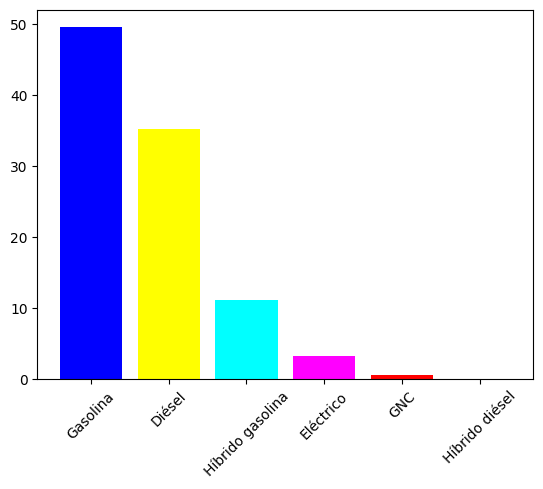

In [413]:
colores = ["blue", "yellow", "cyan", "magenta", "red", "silver"]

etiquetas = ["Gasolina", "Diésel", "Híbrido gasolina","Eléctrico", "GNC", "Híbrido diésel"]

porcentajes.sort(reverse = True)

plt.xticks(rotation = 45)

plt.bar(etiquetas, porcentajes, color = colores)

In [414]:
# Eliminar registros por tipo de combustible "Híbrido díesel"

indices_hibr_diesel = df.loc[df["Tipo combustible"] == "Híbrido diésel"].index

df_1 = df.drop(index = indices_hibr_diesel)

In [415]:
# Eliminar registros por tipo de combustible "GNC"

indices_gnc = df.loc[df["Tipo combustible"] == "GNC"].index

df_1 = df.drop(index = indices_gnc)

Guardar un nuevo dataframe con los valores eliminados.

#### Columna precio

In [416]:
# Media aritmética

df_1["Precio al contado"].sum() / 9933

21728.679452330616

In [417]:
df_1[df_1["Precio al contado"] >= 1000] 

,index,Nombre,Detalles,Precio al contado,Año matriculación,Kilometros,Tipo combustible,Tipo de cambio,Potencia,Puertas,Tipo de vendedor
0,0,CITROEN C5 Aircross,BlueHDi S&S Shine EAT8 180,19500.0,2019,6247.3,Diésel,Automática,176,5,Profesional
1,1,MERCEDES Clase A,A 250 4Matic 7G-DCT,37400.0,2022,905.8,Gasolina,Automática,224,5,Profesional
2,2,MINI Countryman,COUNTRYMAN COOPER SD ALL4,12990.0,2014,9510.0,Diésel,Manual,143,5,Profesional
3,3,PEUGEOT 2008,1.2 PureTech S&S GT Line 110,10990.0,2016,9993.7,Gasolina,Manual,110,5,Profesional
4,4,MERCEDES Clase B,B 200 7G-DCT,23790.0,2019,3456.7,Gasolina,Automática,163,5,Profesional
...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,SEAT León,1.6TDI CR Reference 90,10490.0,2016,15206.1,Diésel,Manual,90,5,Profesional
9995,9996,FORD Transit,FT 350 L3 Kombi Ambiente 130,26900.0,2019,11546.9,Diésel,Manual,130,4,Profesional
9996,9997,FIAT Punto,1.3Mjt 16v Feel/Class,4490.0,2008,14911.5,Diésel,Manual,70,5,Profesional
9997,9998,BMW X1,sDrive 18d,20490.0,2019,9459.5,Diésel,Manual,150,5,Profesional


### Columna kilómetros

In [418]:
df_1.sort_values("Kilometros", ascending = False)

,index,Nombre,Detalles,Precio al contado,Año matriculación,Kilometros,Tipo combustible,Tipo de cambio,Potencia,Puertas,Tipo de vendedor
5405,5406,CUPRA Formentor,1.4 e-Hybrid 245 VZ DSG,40500.0,2023,99800.0,Híbrido Gasolina,Automática,245,5,Profesional
4454,4455,PEUGEOT 2008,1.2 PureTech S&S Allure 100,24500.0,2023,98300.0,Gasolina,Manual,100,5,Profesional
4480,4481,PEUGEOT 2008,1.2 PureTech S&S Allure 100,24500.0,2023,98300.0,Gasolina,Manual,100,5,Profesional
5981,5982,SKODA Fabia,1.5 TSI Monte Carlo DSG 110kW,23099.0,2022,90600.0,Gasolina,Automática,150,5,Profesional
7335,7336,HYUNDAI Kona,HEV 1.6 GDI DT Maxx,29400.0,2023,86800.0,Híbrido Gasolina,Automática,141,5,Profesional
...,...,...,...,...,...,...,...,...,...,...,...
9849,9850,AUDI Q3,RS Sportback 2.5 TFSI quattro S tronic,91837.0,1999,0.0,Gasolina,Automática,400,5,Profesional
6907,6908,VOLKSWAGEN Transporter,Furgón 2.0TDI BMT 81kW,42209.0,2024,0.0,Diésel,Manual,110,4,Profesional
8522,8523,KIA Sorento,1.6 T-GDi HEV Plus Edition 4x4,49912.0,2024,0.0,Híbrido Gasolina,Automática,233,5,Profesional
1920,1920,SEAT Ateca,1.5 EcoTSI S&S Style XM,28138.0,2023,0.0,Gasolina,Manual,150,5,Profesional


### Target encoding

In [419]:
combustible = df_1.groupby("Tipo combustible").agg({"Precio al contado" : "mean"})

combustible.reset_index(inplace = True)

combustible

,Tipo combustible,Precio al contado
0,Diésel,20107.970170
1,Eléctrico,33018.132530
2,Gasolina,20240.334880
3,Híbrido Diésel,34043.636364
4,Híbrido Gasolina,29993.780773


In [420]:
combustible_dict = dict(zip(combustible["Tipo combustible"], combustible["Precio al contado"]))

In [421]:
df_1["Combustible_cod"] = df_1["Tipo combustible"].apply(lambda x : combustible_dict[x])

In [422]:
nombre = df_1.groupby("Nombre").agg({"Precio al contado" : "mean"})

nombre.reset_index(inplace = True)

nombre_dict = dict(zip(nombre["Nombre"], nombre["Precio al contado"]))

df_1["Nombre_cod"] = df_1["Nombre"].apply(lambda x : nombre_dict[x])

In [423]:
df_1 = df_1.drop(["Combustible_cod", "Nombre_cod"], axis = 1)

In [424]:
def categorias(df:pd.DataFrame, cols:list, target:str):

    for c in cols: 

        dictio = df.groupby(c).agg({target : "mean"})

        dictio.reset_index(inplace = True)

        dictio = dict(zip(dictio[c], dictio[target]))

        df[c] = df[c].apply(lambda x : dictio[x])

    return df

In [425]:
df_2 = categorias(df_1, ["Tipo combustible", "Nombre"], "Precio al contado")

df_2

,index,Nombre,Detalles,Precio al contado,Año matriculación,Kilometros,Tipo combustible,Tipo de cambio,Potencia,Puertas,Tipo de vendedor
0,0,22196.089888,BlueHDi S&S Shine EAT8 180,19500.0,2019,6247.3,20107.97017,Automática,176,5,Profesional
1,1,28560.186047,A 250 4Matic 7G-DCT,37400.0,2022,905.8,20240.33488,Automática,224,5,Profesional
2,2,21776.520000,COUNTRYMAN COOPER SD ALL4,12990.0,2014,9510.0,20107.97017,Manual,143,5,Profesional
3,3,17527.730612,1.2 PureTech S&S GT Line 110,10990.0,2016,9993.7,20240.33488,Manual,110,5,Profesional
4,4,23339.269231,B 200 7G-DCT,23790.0,2019,3456.7,20240.33488,Automática,163,5,Profesional
...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,18974.282609,1.6TDI CR Reference 90,10490.0,2016,15206.1,20107.97017,Manual,90,5,Profesional
9995,9996,22104.428571,FT 350 L3 Kombi Ambiente 130,26900.0,2019,11546.9,20107.97017,Manual,130,4,Profesional
9996,9997,7135.800000,1.3Mjt 16v Feel/Class,4490.0,2008,14911.5,20107.97017,Manual,70,5,Profesional
9997,9998,22675.901961,sDrive 18d,20490.0,2019,9459.5,20107.97017,Manual,150,5,Profesional


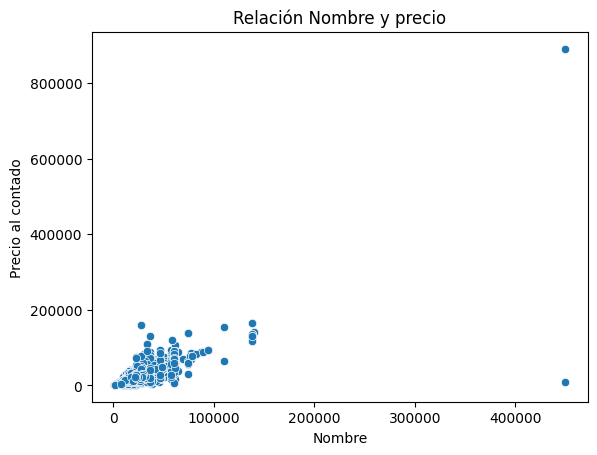

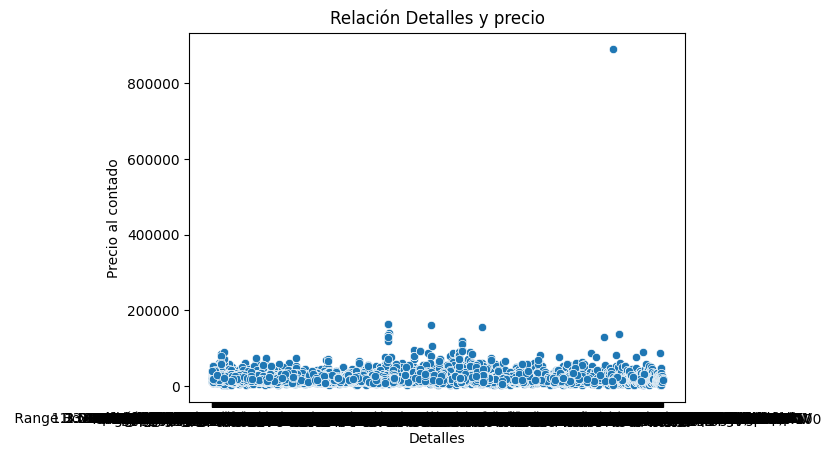

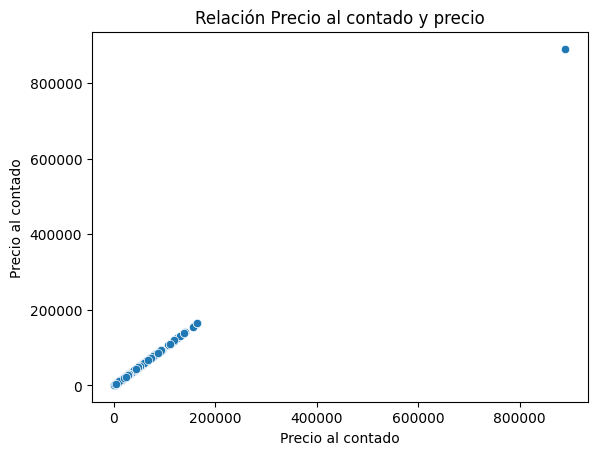

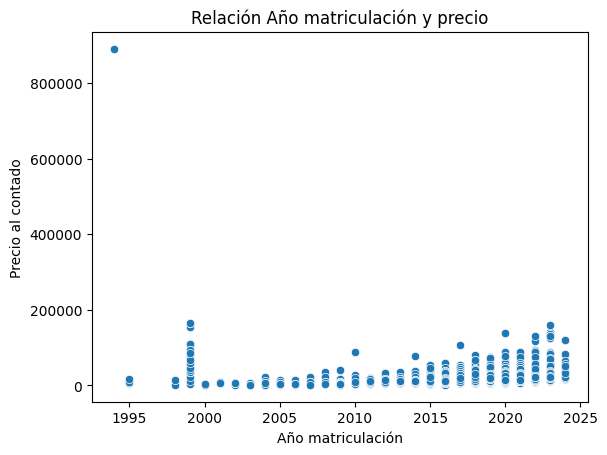

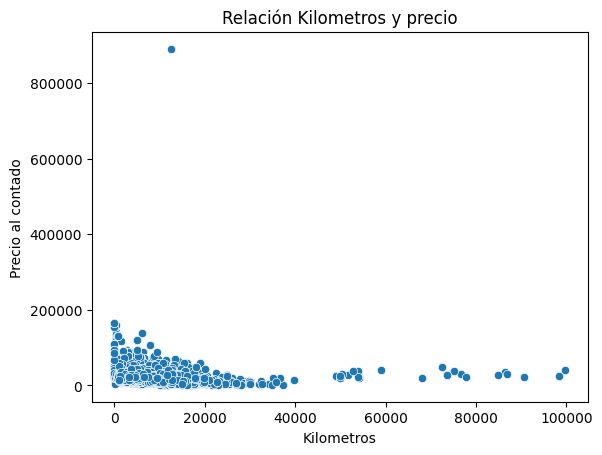

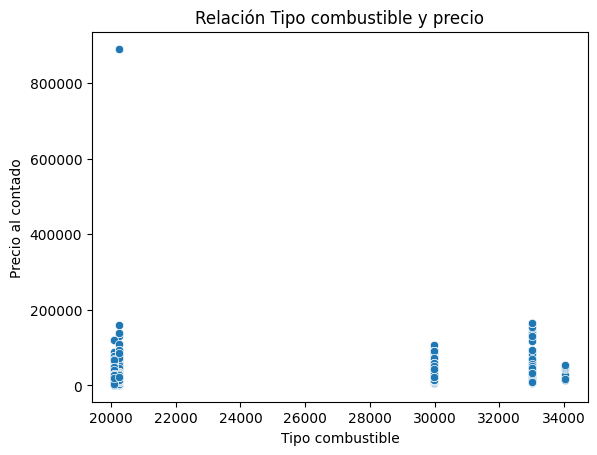

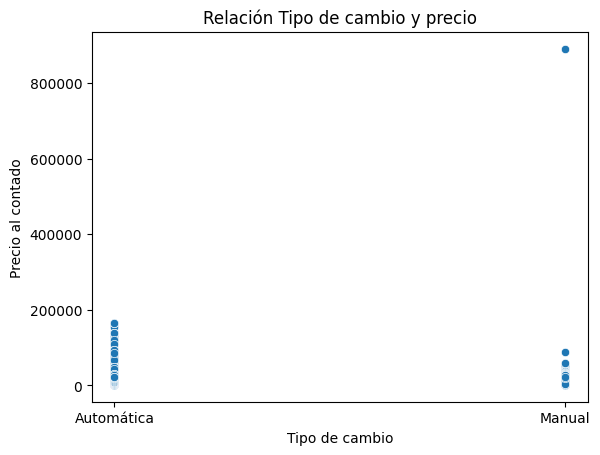

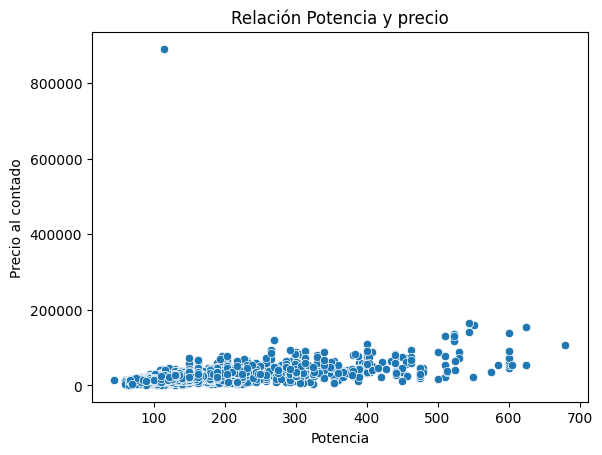

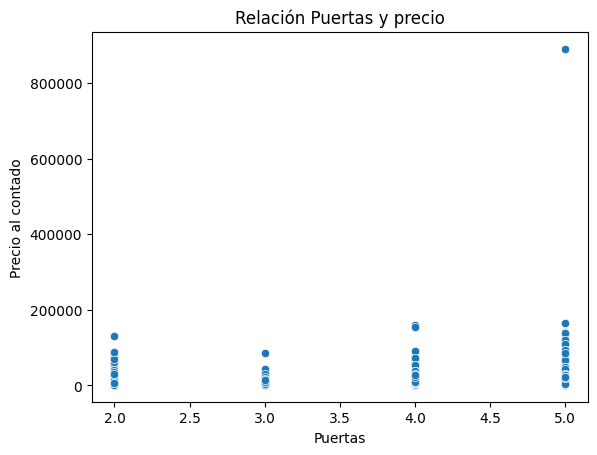

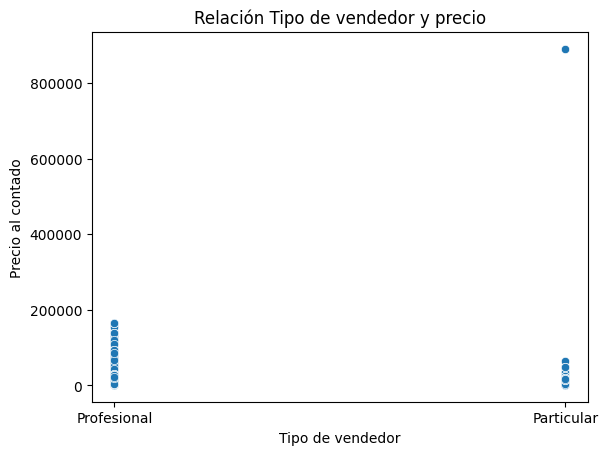

In [426]:
for cols in df_2.columns[1 : ]:

    sns.scatterplot(data = df_2, x = cols, y = "Precio al contado")

    plt.title(f"Relación {cols} y precio")

    plt.show()

<Axes: xlabel='Nombre', ylabel='Potencia'>

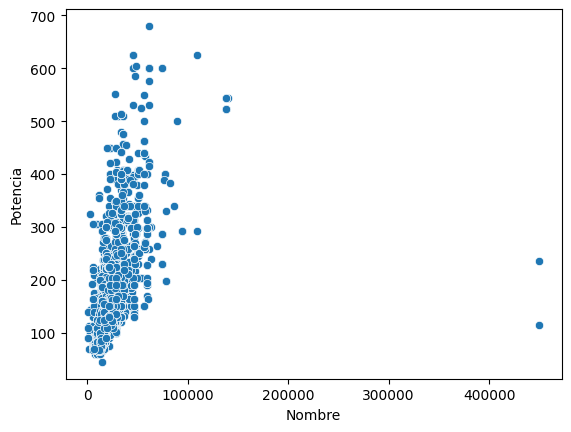

In [427]:
sns.scatterplot(data = df_2, x = "Nombre", y = "Potencia")

In [428]:
df_2 = df_2.drop("Detalles", axis = 1)

df_2 = df_2.drop("Tipo de vendedor", axis = 1)

df_2 = df_2.drop("Tipo de cambio", axis = 1)


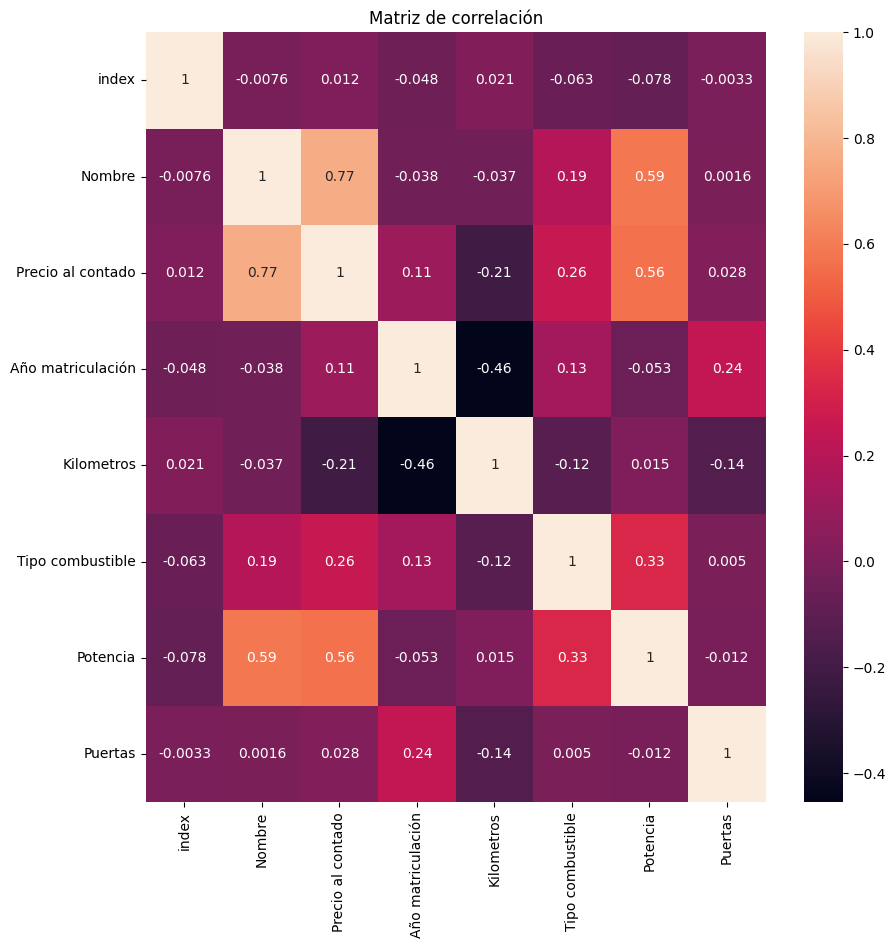

In [429]:
plt.figure(figsize = (10, 10))

sns.heatmap(df_2.corr(), annot = True)

plt.title("Matriz de correlación")

plt.show()

In [430]:
df_2

,index,Nombre,Precio al contado,Año matriculación,Kilometros,Tipo combustible,Potencia,Puertas
0,0,22196.089888,19500.0,2019,6247.3,20107.97017,176,5
1,1,28560.186047,37400.0,2022,905.8,20240.33488,224,5
2,2,21776.520000,12990.0,2014,9510.0,20107.97017,143,5
3,3,17527.730612,10990.0,2016,9993.7,20240.33488,110,5
4,4,23339.269231,23790.0,2019,3456.7,20240.33488,163,5
...,...,...,...,...,...,...,...,...
9994,9995,18974.282609,10490.0,2016,15206.1,20107.97017,90,5
9995,9996,22104.428571,26900.0,2019,11546.9,20107.97017,130,4
9996,9997,7135.800000,4490.0,2008,14911.5,20107.97017,70,5
9997,9998,22675.901961,20490.0,2019,9459.5,20107.97017,150,5


### Prueba del modelo

In [432]:
X = df_2.drop("Precio al contado", axis = 1)

y = df_2["Precio al contado"]

In [433]:
lr = LinearRegression()

lr.fit(X, y)

rf = rfr(250, max_depth = 4, bootstrap = True, min_samples_leaf = 2, n_jobs = -1)

rf.fit(X, y)

gb = gbr(learning_rate = 0.05, n_estimators = 250, max_depth = 4)

gb.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=250)

In [438]:
pred_lr = lr.predict(df_2.drop("Precio al contado", axis = 1))

pred_rf = rf.predict(df_2.drop("Precio al contado", axis = 1))

pred_gb = gb.predict(df_2.drop("Precio al contado", axis = 1))

In [439]:
def adjr2(modelo, X_test, y_test):

    return 1 - (modelo.score(X_test, y_test)) * (len(y_test) - X_test.shape[1] - 1)

In [440]:
print(f'Linear regresion MAE: {mean_absolute_error(df_2["Precio al contado"], pred_lr)}')

print(f'Random forest MAE: {mean_absolute_error(df_2["Precio al contado"], pred_rf)}')

print(f'Gradient Boost MAE: {mean_absolute_error(df_2["Precio al contado"], pred_gb)}')

Linear regresion MAE: 3481.778624598068
Random forest MAE: 3578.3344191068854
Gradient Boost MAE: 2028.2989812934366


In [441]:
print(f'Linear regresion RMSE: {mean_squared_error(df_2["Precio al contado"], pred_lr, squared=False)}')

print(f'Random forest RMSE: {mean_squared_error(df_2["Precio al contado"], pred_rf, squared=False)}')

print(f'Gradient Boost RMSE:{mean_squared_error(df_2["Precio al contado"], pred_gb, squared=False)}')

Linear regresion RMSE: 8637.782499272287
Random forest RMSE: 8343.367277278483
Gradient Boost RMSE:2960.794431525488


In [444]:
print(f'R2 Linear regresion: {r2_score(df_2["Precio al contado"], pred_lr)}')

print(f'R2 Random forest: {r2_score(df_2["Precio al contado"], pred_rf)}')

print(f'R2 Gradient Boost: {r2_score(df_2["Precio al contado"], pred_gb)}')

R2 Linear regresion: 0.6496343217218836
R2 Random forest: 0.6731114179804387
R2 Gradient Boost: 0.9588344863930425


In [446]:
print(f'R2 ajustado linear regresion: {adjr2(lr, df_2.drop("Precio al contado", axis=1), df_2["Precio al contado"])}')

print(f'R2 ajustado Random Forest: {adjr2(rf, df_2.drop("Precio al contado", axis=1), df_2["Precio al contado"])}')

print(f'R2 ajustado Gradient Boost: {adjr2(gb, df_2.drop("Precio al contado", axis=1), df_2["Precio al contado"])}')

R2 ajustado linear regresion: -6446.620643089695


R2 ajustado Random Forest: -6679.630823455855
R2 ajustado Gradient Boost: -9515.432277450947


In [447]:
features = pd.DataFrame(dict(zip(gb.feature_names_in_,gb.feature_importances_)), index=[0]).T

features.reset_index(inplace=True)

features.columns = ['Feature', 'Value']

features = features.sort_values('Value', ascending=False)

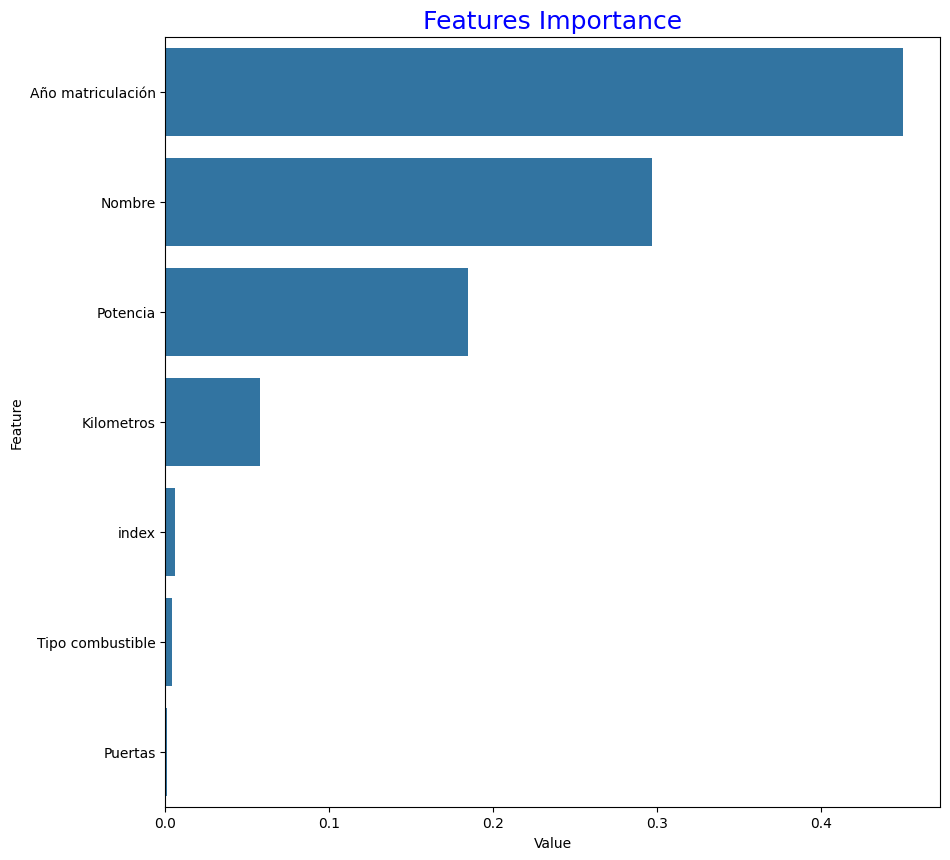

In [448]:
plt.figure(figsize=(10,10))

sns.barplot(data=features, y='Feature', x='Value')

plt.title('Features Importance', color='b', fontsize=18)

plt.show();